# 1 Import Necessary Libraries

In [1]:
# !pip install tpot

In [2]:
!pip install pycaret

  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prasad\\AppData\\Local\\Temp\\pip-uninstall-sxd2cvpx\\ndimage\\_nd_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp38-cp38-win_amd64.whl (14 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [4]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prasad\\anaconda3\\Lib\\site-packages\\sklearn\\~_check_build\\_check_build.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


# 2 Get Data

In [6]:
Data = pd.read_csv("C:/Users/prasad/Downloads/pronostico_dataset.csv", sep=";")
Data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [7]:
Data.shape

(6000, 6)

# 3 Data Understanding

### 3.1 Perform Intial Analysis

In [8]:
Data.shape

(6000, 6)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [10]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6000.0,2999.500000,1732.195139,0.000000,1499.750000,2999.500000,4499.250000,5999.000000
age,6000.0,60.464121,8.564392,35.164761,54.371941,59.831159,65.809652,103.279497
systolic_bp,6000.0,100.694822,10.669267,69.675429,93.267420,100.119926,107.439501,151.699660
diastolic_bp,6000.0,90.505547,9.648200,62.807105,83.641788,89.912429,96.682405,133.456382
cholesterol,6000.0,100.628255,10.433915,69.967453,93.202373,100.060637,107.250829,148.233544


In [11]:
Data.isna().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

<AxesSubplot:>

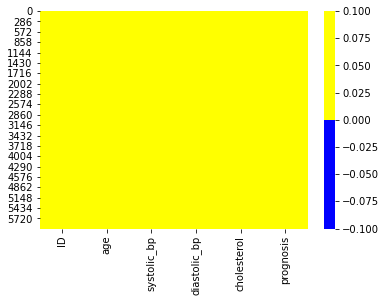

In [12]:
import seaborn as sns
cols = Data.columns 
colours = ['#0000ff', '#ffff00'] # specify the colours blue is missing.
sns.heatmap(Data[cols].isnull(),
            cmap=sns.color_palette(colours))

#Good!. There is no missing value and all features type are number. Therefore, there is no need to preprocess for missing values

### 3.1.1Droping the ID Coloumn  Because it has no use in prediction of retinopathy

In [13]:
Data.drop(columns='ID',inplace=True)

In [14]:
Data.duplicated().sum()

0

In [15]:
# we use labelencoder on target variable 
label_encoder= LabelEncoder()
Data.iloc[:,-1]=label_encoder.fit_transform(Data.iloc[:,-1])

In [16]:
Data.head(10)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
5,52.181782,121.080264,110.488129,115.468279,1
6,68.722144,115.232290,92.730813,106.784960,1
7,58.716578,98.653683,94.172130,100.829654,1
8,59.121758,102.681371,96.991612,106.331045,1
9,63.624683,96.341053,80.919213,121.558605,1


In [17]:
# mean of the target variable of no_retinopathy & retinopathy
pd.pivot_table(Data,values=['age','systolic_bp','diastolic_bp','cholesterol'],index='prognosis',aggfunc='mean')

,age,cholesterol,diastolic_bp,systolic_bp
prognosis,,,,
0,57.136708,97.236411,88.702601,96.962551
1,63.603982,103.828917,92.206868,104.216722


<AxesSubplot:xlabel='age', ylabel='Density'>

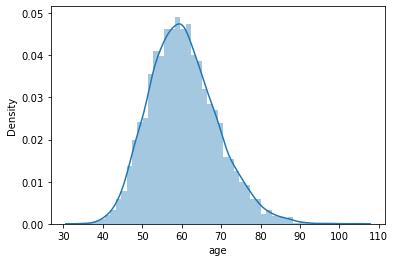

In [18]:
sns.distplot(Data['age'])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

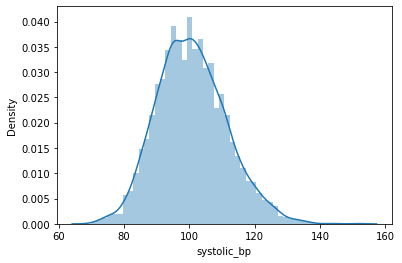

In [19]:
sns.distplot(Data['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

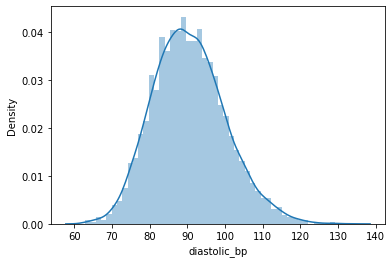

In [20]:
sns.distplot(Data['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

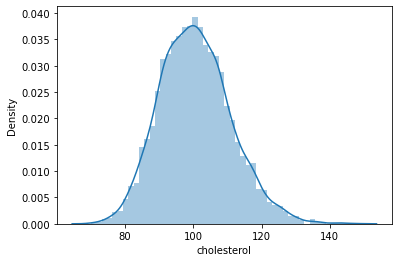

In [21]:
sns.distplot(Data['cholesterol'])

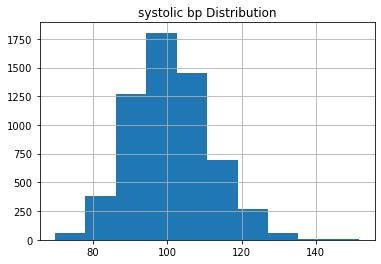

In [22]:
Data["systolic_bp"].hist()
plt.title('systolic bp Distribution')
plt.show()

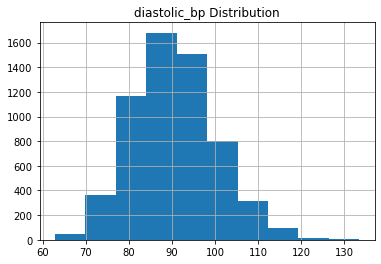

In [23]:
Data["diastolic_bp"].hist()
plt.title('diastolic_bp Distribution')
plt.show()

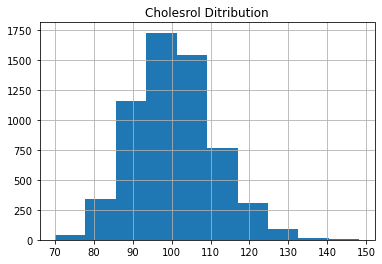

In [24]:
Data["cholesterol"].hist()
plt.title('Cholesrol Ditribution')
plt.show()

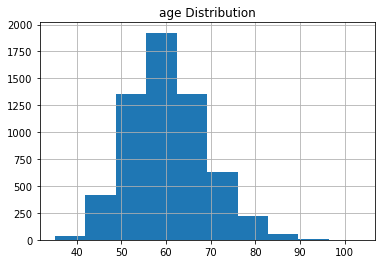

In [25]:
Data['age'].hist()
plt.title('age Distribution')
plt.show()

In [26]:
#checking the data is balanced or not
Data['prognosis'].value_counts()

1    3087
0    2913
Name: prognosis, dtype: int64

<AxesSubplot:xlabel='prognosis', ylabel='count'>

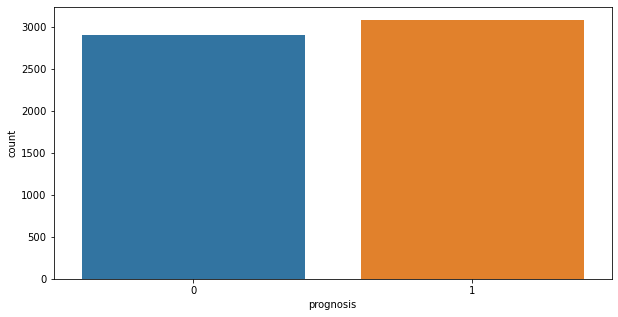

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(Data['prognosis'])

<AxesSubplot:xlabel='prognosis', ylabel='age'>

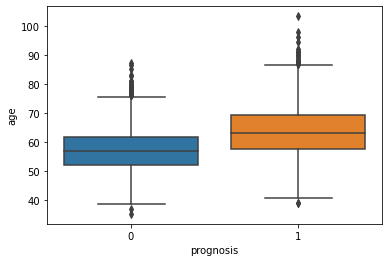

In [28]:
sns.boxplot(x='prognosis',y='age',data=Data)

<AxesSubplot:xlabel='age'>

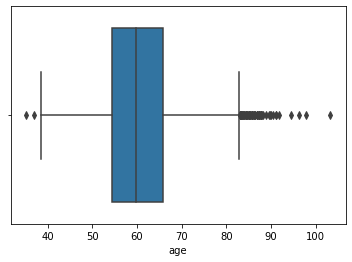

In [29]:
sns.boxplot('age',data=Data)

In [30]:
Q1 = Data.age.quantile(0.25)
Q3 = Data.age.quantile(0.75)


IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

Data1 =Data[(Data.age<lower_limit)|(Data.age>upper_limit)]
Data1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
24,82.979636,100.211368,86.173067,97.026684,1
144,84.334735,120.766914,94.047859,107.825557,1
292,83.385591,99.193072,91.498595,94.259227,1
465,84.688583,100.999339,88.130268,99.921832,1
494,88.192280,105.019242,96.770507,102.213642,1
...,...,...,...,...,...
5665,87.362573,98.688430,96.728927,97.918917,1
5681,86.207819,79.627072,83.980721,95.032315,1
5894,85.331533,94.221222,106.305896,111.711281,1
5959,89.839618,102.447308,107.572729,107.965425,1


<AxesSubplot:xlabel='prognosis', ylabel='systolic_bp'>

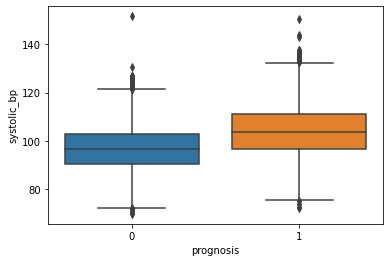

In [31]:
sns.boxplot(x='prognosis',y='systolic_bp',data=Data)

<AxesSubplot:xlabel='systolic_bp'>

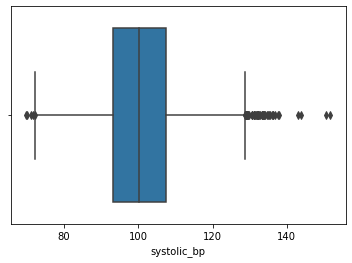

In [32]:
sns.boxplot('systolic_bp',data=Data)

In [33]:
Q1 = Data.systolic_bp.quantile(0.25)
Q3 = Data.systolic_bp.quantile(0.75)


IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

Data2 =Data[(Data.systolic_bp<lower_limit)|(Data.systolic_bp>upper_limit)]
Data2

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
41,48.983566,131.120992,92.913213,105.666027,1
140,48.487584,132.133052,104.744896,111.873003,1
276,64.384898,132.548669,87.304374,100.381664,1
367,56.709259,136.298251,113.124571,111.942364,1
389,61.424309,133.231311,105.036232,105.950199,1
466,52.306971,132.681115,93.416624,116.187328,1
504,57.094555,133.972478,91.472213,109.131733,1
534,49.975447,133.442836,89.371453,117.593901,1
543,74.532779,129.121586,86.182661,106.376069,1
601,63.685795,131.800197,87.750273,116.396646,1


<AxesSubplot:xlabel='prognosis', ylabel='diastolic_bp'>

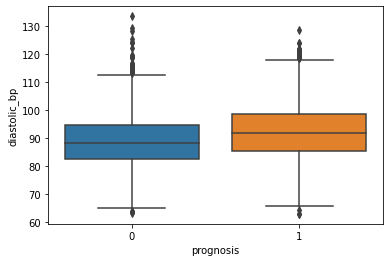

In [34]:
sns.boxplot(x='prognosis',y='diastolic_bp',data=Data)

<AxesSubplot:xlabel='diastolic_bp'>

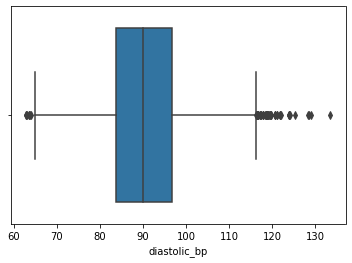

In [35]:
sns.boxplot('diastolic_bp',data=Data)

In [36]:
Q1 = Data.diastolic_bp.quantile(0.25)
Q3 = Data.diastolic_bp.quantile(0.75)


IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

Data3 =Data[(Data.diastolic_bp<lower_limit)|(Data.diastolic_bp>upper_limit)]
Data3

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
20,41.663762,113.817344,116.311952,117.852312,1
35,61.355212,97.823657,116.639356,111.179809,1
242,58.871766,97.247527,124.143136,96.775539,0
406,67.404012,104.409097,123.913707,108.544215,1
430,56.128985,118.542803,121.031955,119.820215,1
545,56.313788,102.927237,125.289993,116.587377,0
589,38.829539,106.671573,120.972543,107.418557,1
599,58.488598,118.127393,117.841303,93.380259,1
660,52.514843,109.308127,129.086305,106.808021,0
819,60.197121,110.094324,128.568519,131.925347,1


<AxesSubplot:xlabel='prognosis', ylabel='cholesterol'>

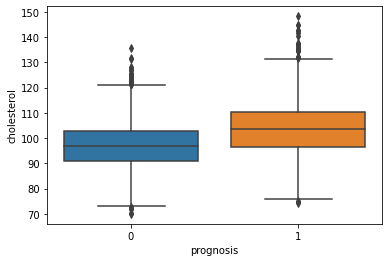

In [37]:
sns.boxplot(x='prognosis',y='cholesterol',data=Data)

<AxesSubplot:xlabel='cholesterol'>

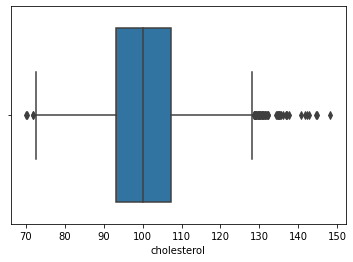

In [38]:
sns.boxplot('cholesterol',data=Data)

In [39]:
Q1 = Data.cholesterol.quantile(0.25)
Q3 = Data.cholesterol.quantile(0.75)


IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

Data4 =Data[(Data.cholesterol<lower_limit)|(Data.cholesterol>upper_limit)]
Data4

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
152,53.944245,117.305536,111.502024,135.194476,1
450,51.608343,86.605764,65.886401,71.816400,0
796,60.642730,113.459178,102.621072,128.788513,1
819,60.197121,110.094324,128.568519,131.925347,1
839,62.729824,116.394422,109.388297,131.422153,0
906,55.691815,118.118189,92.812373,130.806376,1
1002,56.487189,125.727737,104.201718,140.607313,1
1032,58.252152,136.205482,97.084642,129.562672,1
1051,52.809499,105.003966,96.124501,130.572975,1
1081,57.346287,106.967621,110.801094,129.032181,1


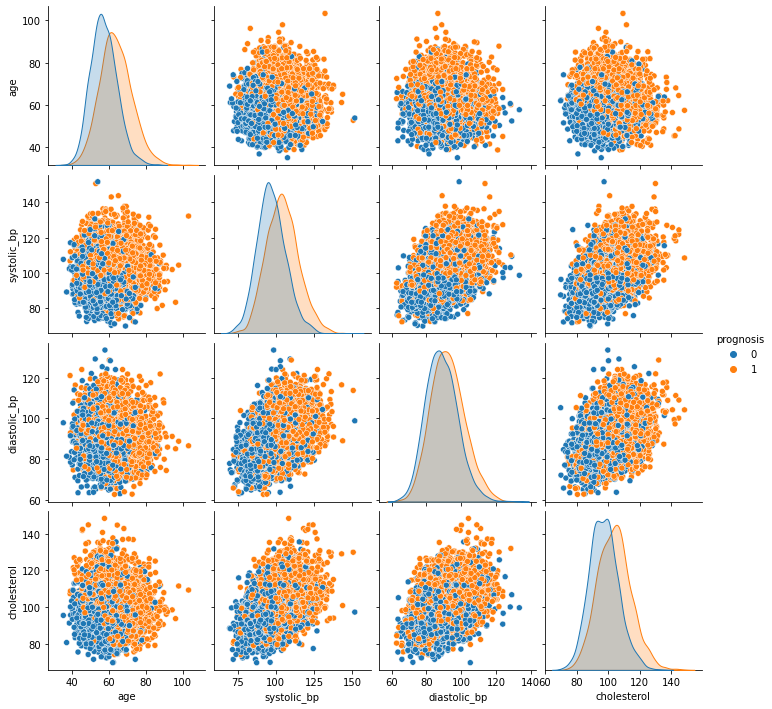

In [40]:
sns.pairplot(Data,hue='prognosis')

In [41]:
corr=Data.corr()
corr

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.010361,-0.005410,-0.006972,0.377440
systolic_bp,0.010361,1.000000,0.405406,0.406029,0.339842
diastolic_bp,-0.005410,0.405406,1.000000,0.398345,0.181541
cholesterol,-0.006972,0.406029,0.398345,1.000000,0.315811
prognosis,0.377440,0.339842,0.181541,0.315811,1.000000


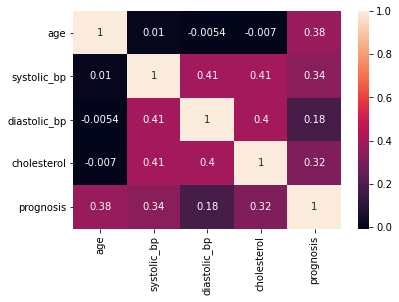

In [42]:
sns.heatmap(data = corr,annot=True)
plt.show()

#####  Inference- 
* age has highest correlation with target variable*

<AxesSubplot:xlabel='prognosis', ylabel='count'>

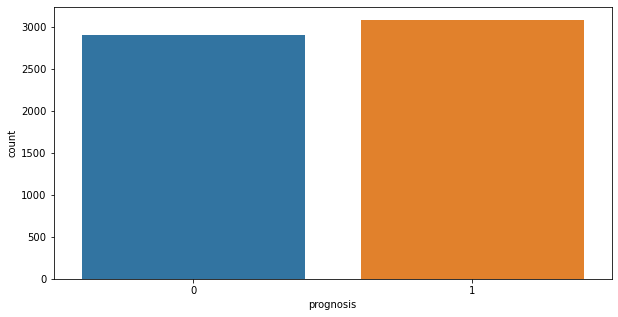

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(Data['prognosis'])

## Handing Outliers by Median

In [44]:
#Age outlier replace by median value of the age feature

median=Data.loc[Data['age']<82,'age'].median()
median2=Data.loc[Data['age']>37,'age'].median()
Data.loc[Data.age>82,'age']=np.nan
Data.loc[Data.age<37,'age']=np.nan
Data.fillna(median,inplace=True)
Data.fillna(median2,inplace=True)

In [45]:
#systolic_bp outlier replace by median value of the age feature

median=Data.loc[Data['systolic_bp']<128,'systolic_bp'].median()
median2=Data.loc[Data['systolic_bp']>73,'systolic_bp'].median()
Data.loc[Data.systolic_bp>128,'systolic_bp']=np.nan
Data.loc[Data.systolic_bp<73,'systolic_bp']=np.nan
Data.fillna(median,inplace=True)
Data.fillna(median2,inplace=True)

In [46]:
#diastolic_bp outlier replace by median value of the age feature

median=Data.loc[Data['diastolic_bp']<115,'diastolic_bp'].median()
median2=Data.loc[Data['diastolic_bp']>65,'diastolic_bp'].median()
Data.loc[Data.diastolic_bp>115,'diastolic_bp']=np.nan
Data.loc[Data.diastolic_bp<65,'diastolic_bp']=np.nan
Data.fillna(median,inplace=True)
Data.fillna(median2,inplace=True)

In [47]:
#cholesterol outlier replace by median value of the age feature

median=Data.loc[Data['cholesterol']<127,'cholesterol'].median()
median2=Data.loc[Data['cholesterol']>73,'cholesterol'].median()
Data.loc[Data.cholesterol>127,'cholesterol']=np.nan
Data.loc[Data.cholesterol<73,'cholesterol']=np.nan
Data.fillna(median,inplace=True)
Data.fillna(median2,inplace=True)

In [48]:
Data

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,59.694163,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


## Dividing data in X and Y

In [49]:
# Splitting the independent and dependent variables
X = Data.drop(columns="prognosis",axis=1)
Y = Data.prognosis
X.shape,Y.shape

((6000, 4), (6000,))

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
# standardization 
std_scaler = StandardScaler()
X_scaler = std_scaler.fit_transform(X) 
print(X_scaler)

[[ 2.12861278 -1.49920548 -1.11897174 -2.06484113]
 [ 0.42438837 -0.10356533 -0.58939197  1.02215518]
 [ 1.10701842  1.08197356  2.15123868  0.05277541]
 ...
 [-0.56917997 -0.19847897  1.36706315  2.08684533]
 [ 0.41679484  0.63229355 -0.23766006  0.58280688]
 [ 0.29681608 -0.34909274 -0.36731164  0.8438899 ]]


In [52]:
#Spliting the variable into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler,Y, test_size=0.20, random_state=40)


## Auto Machine Learning Model

## Tpot

In [53]:
#Import Auto Machine Learning Tpot
from tpot import TPOTClassifier
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=19, min_samples_split=6, n_estimators=100)
0.7191666666666666


## Pycaret

In [54]:
import pycaret
from pycaret.classification import *
cls = setup(data = Data , target='prognosis')


,Description,Value
0,session_id,6999
1,Target,prognosis
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6000, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [55]:
#model training and selections
best= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7328,0.8095,0.7288,0.7442,0.7363,0.4656,0.4658,0.0190
lr,Logistic Regression,0.7311,0.8063,0.7340,0.7392,0.7364,0.4620,0.4622,1.8230
ridge,Ridge Classifier,0.7309,0.0000,0.7260,0.7429,0.7342,0.4618,0.4622,0.0390
lda,Linear Discriminant Analysis,0.7309,0.8063,0.7260,0.7429,0.7342,0.4618,0.4622,0.0150
gbc,Gradient Boosting Classifier,0.7261,0.8034,0.7567,0.7221,0.7387,0.4513,0.4522,0.3410
ada,Ada Boost Classifier,0.7235,0.7905,0.7186,0.7358,0.7268,0.4470,0.4475,0.1430
nb,Naive Bayes,0.7233,0.7980,0.7070,0.7409,0.7233,0.4468,0.4476,0.0130
lightgbm,Light Gradient Boosting Machine,0.7199,0.7906,0.7484,0.7172,0.7323,0.4389,0.4396,0.2870
et,Extra Trees Classifier,0.7154,0.7835,0.7340,0.7173,0.7253,0.4302,0.4306,0.3340
rf,Random Forest Classifier,0.7125,0.7824,0.7419,0.7101,0.7254,0.4241,0.4248,0.4850


# MODEL BUILDING

## 1. RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_jobs=2, random_state=40)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

### Validation of model

In [57]:
y_pred_rfc_train= rfc_model.predict(X_train)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_rfc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_rfc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_rfc_train))

Accuracy of training model 1.0
Confusion Matrics [[2321    0]
 [   0 2479]]
Classificaton Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2321
           1       1.00      1.00      1.00      2479

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800



In [60]:
y_pred_rfc_test= rfc_model.predict(X_test)

In [61]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_rfc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_rfc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_rfc_test))

Accuracy of testing model 0.7025
Confusion Matrics [[392 200]
 [157 451]]
Classificaton Report               precision    recall  f1-score   support

           0       0.71      0.66      0.69       592
           1       0.69      0.74      0.72       608

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



## 2. LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Validation of model

In [63]:
y_pred_lr_train=lr_model.predict(X_train)

In [64]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_lr_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_lr_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_lr_train))

Accuracy of training model 0.7416666666666667
Confusion Matrics [[1698  623]
 [ 617 1862]]
Classificaton Report                precision    recall  f1-score   support

           0       0.73      0.73      0.73      2321
           1       0.75      0.75      0.75      2479

    accuracy                           0.74      4800
   macro avg       0.74      0.74      0.74      4800
weighted avg       0.74      0.74      0.74      4800



In [65]:
y_pred_lr_test= lr_model.predict(X_test)

In [66]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_lr_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_lr_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_lr_test))

Accuracy of testing model 0.7125
Confusion Matrics [[415 177]
 [168 440]]
Classificaton Report               precision    recall  f1-score   support

           0       0.71      0.70      0.71       592
           1       0.71      0.72      0.72       608

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



## 3. GAUSSIAN NAIVE BAYES CLASSIFIER

In [67]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_model= GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Validation of model

In [68]:
y_pred_gnb_train=gnb_model.predict(X_train)

In [69]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gnb_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_gnb_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_gnb_train))

Accuracy of training model 0.73375
Confusion Matrics [[1723  598]
 [ 680 1799]]
Classificaton Report                precision    recall  f1-score   support

           0       0.72      0.74      0.73      2321
           1       0.75      0.73      0.74      2479

    accuracy                           0.73      4800
   macro avg       0.73      0.73      0.73      4800
weighted avg       0.73      0.73      0.73      4800



In [70]:
y_pred_gnb_test = gnb_model.predict(X_test)

In [71]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gnb_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_gnb_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_gnb_test))

Accuracy of testing model 0.72
Confusion Matrics [[424 168]
 [168 440]]
Classificaton Report               precision    recall  f1-score   support

           0       0.72      0.72      0.72       592
           1       0.72      0.72      0.72       608

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



## 4. SUPPORT VECTOR MACHINE

In [72]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Validation of model

In [73]:
y_pred_svc_train=svc_model.predict(X_train)

In [74]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_svc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_svc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_svc_train))

Accuracy of training model 0.7416666666666667
Confusion Matrics [[1689  632]
 [ 608 1871]]
Classificaton Report                precision    recall  f1-score   support

           0       0.74      0.73      0.73      2321
           1       0.75      0.75      0.75      2479

    accuracy                           0.74      4800
   macro avg       0.74      0.74      0.74      4800
weighted avg       0.74      0.74      0.74      4800



In [75]:
y_pred_svc_test = svc_model.predict(X_test)

In [76]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_svc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_svc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_svc_test))

Accuracy of testing model 0.715
Confusion Matrics [[414 178]
 [164 444]]
Classificaton Report               precision    recall  f1-score   support

           0       0.72      0.70      0.71       592
           1       0.71      0.73      0.72       608

    accuracy                           0.71      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.72      0.71      0.71      1200



## 5. XGBOOST CLASSIFIER

In [77]:
# pip install xgboost

In [78]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

### Validation of model

In [79]:
y_pred_xgb_train=xgb_model.predict(X_train)

In [80]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_xgb_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_xgb_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_xgb_train))

Accuracy of training model 0.9402083333333333
Confusion Matrics [[2174  147]
 [ 140 2339]]
Classificaton Report                precision    recall  f1-score   support

           0       0.94      0.94      0.94      2321
           1       0.94      0.94      0.94      2479

    accuracy                           0.94      4800
   macro avg       0.94      0.94      0.94      4800
weighted avg       0.94      0.94      0.94      4800



In [81]:
y_pred_xgb_test = xgb_model.predict(X_test)

In [82]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_xgb_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_xgb_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_xgb_test))

Accuracy of testing model 0.7108333333333333
Confusion Matrics [[397 195]
 [152 456]]
Classificaton Report               precision    recall  f1-score   support

           0       0.72      0.67      0.70       592
           1       0.70      0.75      0.72       608

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



## 6. DECISION TREE

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier(criterion = 'entropy')
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Validation of model

In [84]:
y_pred_dtc_train = dtc_model.predict(X_train)

In [85]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_dtc_train))

Accuracy of training model 1.0
Confusion Matrics [[2321    0]
 [   0 2479]]
Classificaton Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2321
           1       1.00      1.00      1.00      2479

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800



In [86]:
y_pred_dtc_test = dtc_model.predict(X_test)

In [87]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_dtc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_dtc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_dtc_test))

Accuracy of testing model 0.6316666666666667
Confusion Matrics [[368 224]
 [218 390]]
Classificaton Report               precision    recall  f1-score   support

           0       0.63      0.62      0.62       592
           1       0.64      0.64      0.64       608

    accuracy                           0.63      1200
   macro avg       0.63      0.63      0.63      1200
weighted avg       0.63      0.63      0.63      1200



## 7. KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Validation of model

In [89]:
y_pred_knn_train = knn_model.predict(X_train)

In [90]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_knn_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_knn_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_knn_train))

Accuracy of training model 0.8391666666666666
Confusion Matrics [[1916  405]
 [ 367 2112]]
Classificaton Report                precision    recall  f1-score   support

           0       0.84      0.83      0.83      2321
           1       0.84      0.85      0.85      2479

    accuracy                           0.84      4800
   macro avg       0.84      0.84      0.84      4800
weighted avg       0.84      0.84      0.84      4800



In [91]:
y_pred_knn_test = knn_model.predict(X_test)

In [92]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_knn_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_knn_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_knn_test))

Accuracy of testing model 0.6591666666666667
Confusion Matrics [[376 216]
 [193 415]]
Classificaton Report               precision    recall  f1-score   support

           0       0.66      0.64      0.65       592
           1       0.66      0.68      0.67       608

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200



In [93]:
#Spliting the variable into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler,Y, test_size=0.20, random_state=2903)

## 8. GradientBoostingClassifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                       learning_rate=0.1, loss='deviance', max_depth=3,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, n_estimators=100,
                                       n_iter_no_change=None,
                                       random_state=2903, subsample=1.0, tol=0.0001,
                                       validation_fraction=0.1, verbose=0,
                                       warm_start=False)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2903, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Validation of model

In [95]:
y_pred_gbc_train= gbc_model.predict(X_train)

In [96]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gbc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_gbc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_gbc_train))

Accuracy of training model 0.7722916666666667
Confusion Matrics [[1712  611]
 [ 482 1995]]
Classificaton Report                precision    recall  f1-score   support

           0       0.78      0.74      0.76      2323
           1       0.77      0.81      0.78      2477

    accuracy                           0.77      4800
   macro avg       0.77      0.77      0.77      4800
weighted avg       0.77      0.77      0.77      4800



In [97]:
y_pred_gbc_test= gbc_model.predict(X_test)

In [98]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gbc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_gbc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_gbc_test))

Accuracy of testing model 0.7483333333333333
Confusion Matrics [[431 159]
 [143 467]]
Classificaton Report               precision    recall  f1-score   support

           0       0.75      0.73      0.74       590
           1       0.75      0.77      0.76       610

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



## Accuracy comparision

In [109]:
model = ['RANDOM FOREST','LOGISTIC REGRESSION','GAUSSIAN NAIVE BAYES CLASSIFIER','SVC','XGB','DECISION TREE','KNN','GradientBoostingClassifier']

training = [
     (accuracy_score(y_train,y_pred_rfc_train)*100),
     (accuracy_score(y_train,y_pred_lr_train)*100),
     (accuracy_score(y_train,y_pred_gnb_train)*100),
     (accuracy_score(y_train,y_pred_svc_train)*100),
     (accuracy_score(y_train,y_pred_xgb_train)*100),
     (accuracy_score(y_train,y_pred_dtc_train)*100),
     (accuracy_score(y_train,y_pred_knn_train)*100),
     (accuracy_score(y_train,y_pred_gbc_train)*100)
]

testing = [
     (accuracy_score(y_test,y_pred_rfc_test)*100),
     (accuracy_score(y_test,y_pred_lr_test)*100),
     (accuracy_score(y_test,y_pred_gnb_test)*100),
     (accuracy_score(y_test,y_pred_svc_test)*100),
     (accuracy_score(y_test,y_pred_xgb_test)*100),
     (accuracy_score(y_test,y_pred_dtc_test)*100),
     (accuracy_score(y_test,y_pred_knn_test)*100),
     (accuracy_score(y_test,y_pred_gbc_test)*100)
]

In [110]:
df = pd.DataFrame()
df['Model'] = model
df['Training'] = training
df['Testing'] = testing
df

,Model,Training,Testing
0,RANDOM FOREST,50.083333,49.416667
1,LOGISTIC REGRESSION,50.291667,48.083333
2,GAUSSIAN NAIVE BAYES CLASSIFIER,50.250000,48.333333
3,SVC,50.333333,48.166667
4,XGB,49.979167,48.583333
5,DECISION TREE,50.083333,50.166667
6,KNN,50.041667,49.083333
7,GradientBoostingClassifier,77.229167,74.833333


## 8. ARTIFICAIL NEURAL NETWORK

In [ ]:
# !pip install tensorflow

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input,Dense
# from tensorflow.keras.models import Sequential
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# accuracies = []

# for i in range(10):
#     tf.random.set_seed(i)
#     nn_model= Sequential()
#     nn_model.add(Dense(1, input_dim=4, activation='sigmoid'))
#     nn_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
#     nn_model.fit(X_train,y_train,epochs=1000,batch_size=32,verbose=0)
#     _,accuracy = nn_model.evaluate(X_test,y_test)
#     accuracies.append(accuracy*100)


In [ ]:
# sum(accuracies)/len(accuracies)